# Parkinson's Disease Data Analysis

### Overview

The purpose of this analysis project is to reveal and analyze patterns between Parkinson's diagnosis and patient demographic, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, and symptoms. The core of this analysis revolves around exploring the symptoms and conditions by which Parkinson's occurs with a focus on traditional data analysis techniques including descriptive statstics, visualizations, correlation analysis. 

### Dataset Information

The dataset used for this analysis is sourced from [Parkinson’s Disease Dataset Analysis](https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis) by Rabie El Kharoua. Though the synthetic nature of the dataset may impair its ability to fully capture the complexities of Parkinsons's, it provides a controlled environment for exploratory analysis. This approach helps outline trends and model the effective use of traditional analysis techniques, laying the groundwork for future studies and applications.

### License

This notebook is licensed under the MIT License. See the [LICENSE](./LICENSE) file for details.

In [256]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from scipy.stats import mannwhitneyu

In [257]:
# Loading data from CSV file into dataframe
og_parkinsons_df = pd.read_csv('parkinsons_disease_data.csv')

In [258]:
# Splitting original dataframe into two based on diagnosis and retaining all information in respective rows
pos_parkinsons_df = og_parkinsons_df[og_parkinsons_df['Diagnosis'] == 1]
neg_parkinsons_df = og_parkinsons_df[og_parkinsons_df['Diagnosis'] == 0]
pos_parkinsons_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
7,3065,70,1,0,0,36.758282,1,19.988866,3.891749,3.421960,...,1.190611,1,0,0,1,0,0,1,1,DrXXXConfid
8,3066,80,0,2,1,22.380587,1,7.293288,2.595670,4.784827,...,3.438111,0,0,0,0,0,0,0,1,DrXXXConfid


In [259]:
# Listing the columns for easy viewing when selecting columns
pos_parkinsons_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

### Demographics

##### Age, Gender, & Ethnicity

#### Age

In [260]:
# Beginning age analysis with the mean
mean_age = pos_parkinsons_df['Age'].mean()
print(round(float(mean_age), 2))

70.2


In [261]:
#Sorting the rows by age in ascending order
pos_parkinsons_df = pos_parkinsons_df.sort_values(by = 'Age', ascending = True)
pos_parkinsons_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
1008,4066,50,1,0,2,19.530419,0,11.004088,2.672484,1.941495,...,1.512869,0,1,0,0,0,1,1,1,DrXXXConfid
1212,4270,50,0,3,1,20.767557,0,9.934297,1.981720,0.481730,...,4.219059,0,0,0,0,0,0,0,1,DrXXXConfid
705,3763,50,1,0,2,26.447587,0,8.510853,6.887329,5.622417,...,0.033718,1,1,0,0,0,0,1,1,DrXXXConfid
728,3786,50,1,0,1,17.232007,0,4.234006,8.107702,8.951790,...,2.683678,1,0,0,0,0,0,1,1,DrXXXConfid
730,3788,50,0,2,0,26.344871,0,0.070912,8.011039,4.008724,...,1.818721,0,0,1,0,0,0,1,1,DrXXXConfid


In [262]:
# Creating a new df which groups the data from pos_parkinsons_df by "Age" and setting "Diagnosis" as one of the columns.
# Sums the values in the "Diagnosis" column for each age group then renames column to "Total Diagnoses"
age_group = pos_parkinsons_df.groupby('Age')['Diagnosis'].sum().reset_index()
age_group = age_group.rename(columns = {'Diagnosis' : 'Total Diagnoses'})
age_group.head()

,Age,Total Diagnoses
0,50,34
1,51,32
2,52,28
3,53,27
4,54,33


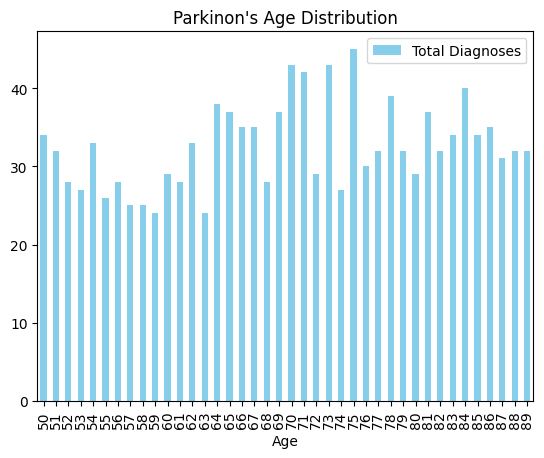

In [263]:
# Plotting data with a bar chart
age_group.plot(kind = 'bar', x = 'Age', y = 'Total Diagnoses', title = "Parkinon's Age Distribution", color = 'skyblue');

#### Gender

In [264]:
# Counting gender populations of entire tested group
gender_count = og_parkinsons_df.groupby('Gender')['Gender'].count()
gender_count.index = ['Men', 'Women'] #setting the indicies
gender_count

Men      1068
Women    1037
Name: Gender, dtype: int64

In [265]:
# Counting gender populations of diagnosed group
pos_gender_group = pos_parkinsons_df.groupby('Gender')['Gender'].count()
pos_gender_group.index = ['Men', 'Women'] #setting the indicies
pos_gender_group

Men      653
Women    651
Name: Gender, dtype: int64

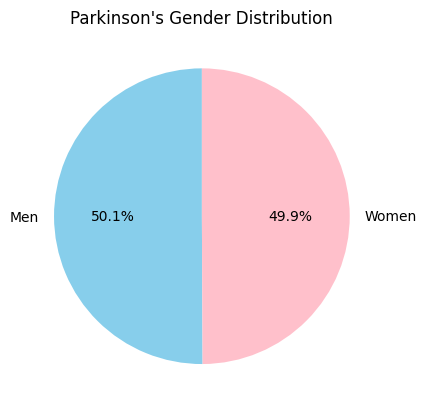

In [266]:
# Visualizing gender distribution across diagnosed population with pie chart
pos_gender_group.plot.pie(
    autopct = '%1.1f%%',
    startangle = 90,
    colors = ['skyblue', 'pink'],
    ylabel = '',
    title = "Parkinson's Gender Distribution"
)
plt.show()

The gender distribution amoung the diagnosed population seems roughly even. Given that the amount of men and women in the tested population are similar, we'll further veirfy the independency of the variables.

In [267]:
# We start with a crosstable which we then feed into a Chi Squared Test.
gender_group = og_parkinsons_df[["Gender", "Diagnosis"]]
cont_table_gender = pd.crosstab(gender_group["Gender"], gender_group["Diagnosis"])
cont_table_gender

Diagnosis,0,1
Gender,,
0,415,653
1,386,651


In [268]:
# The contingency table is used to conduct a Chi Square Test of Independence to verify the variables are independent.
chi2, p, dof, expected = stats.chi2_contingency(cont_table_gender) 
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.5292610893820271
P-value: 0.4669176785760609
Degrees of Freedom: 1
Expected Frequencies:
 [[406.39809976 661.60190024]
 [394.60190024 642.39809976]]


Our P-value is well over 0.05, suggesting that diagnosis and gender are likley independent.

#### Ethnicity

In [269]:
# Function to convert numbers in "Ethnicity" column to their corresponding string labels, as defined in the dataset's data card.
def ethnicity_assignment(x):
    if x == 0:
        return 'Caucasian'
    elif x == 1:
        return 'African American'
    elif x == 2:
        return 'Asian'
    else:
        return 'Other'


In [270]:
ethnicity_count = og_parkinsons_df.groupby('Ethnicity')['Ethnicity'].count().reset_index(name = 'Tested Count')
ethnicity_count

,Ethnicity,Tested Count
0,0,1270
1,1,425
2,2,197
3,3,213


In [271]:
# Creating an independent dataframe just for the ethnicities of the diagnosed population
pos_ethnicity_count = pos_parkinsons_df.groupby("Ethnicity")['Ethnicity'].count().reset_index(name = 'Number Diagnosed')
pos_ethnicity_count['Ethnicity'] = pos_ethnicity_count['Ethnicity'].apply(lambda x: ethnicity_assignment(x)) # Applying our ethnicity_assignment function
pos_ethnicity_count

,Ethnicity,Number Diagnosed
0,Caucasian,780
1,African American,275
2,Asian,124
3,Other,125


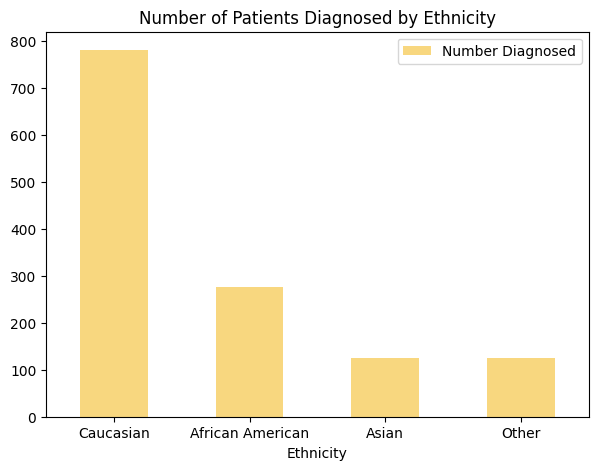

In [272]:
# Plotting the number of individuals of each ethnicity diagnosed. 
pos_ethnicity_count.plot(kind = 'bar', x = 'Ethnicity', y = 'Number Diagnosed', color = '#F8D77F', title = "Number of Patients Diagnosed by Ethnicity", figsize = (7,5));
plt.xticks(rotation = 0);

Number of diagnoses across ethnicities varies greatly, but so does the size of each ethnicity group tested, as seen in ethnicity_count.

In [273]:
# Here we create a column with the diagnosed count and apply the ethnicity_assignment.
# In addition, we calculate the percentage_diagnosed for each ethnicity to further investigate the ratios.
ethnicity_count['Diagnosed'] = pos_parkinsons_df.groupby('Ethnicity')['Ethnicity'].count()
ethnicity_count['Ethnicity'] = ethnicity_count['Ethnicity'].apply(lambda x : ethnicity_assignment(x))
ethnicity_count['Percentage Diagnosed'] = (ethnicity_count['Diagnosed'] / ethnicity_count['Tested Count']) * 100
ethnicity_count

,Ethnicity,Tested Count,Diagnosed,Percentage Diagnosed
0,Caucasian,1270,780,61.417323
1,African American,425,275,64.705882
2,Asian,197,124,62.944162
3,Other,213,125,58.685446


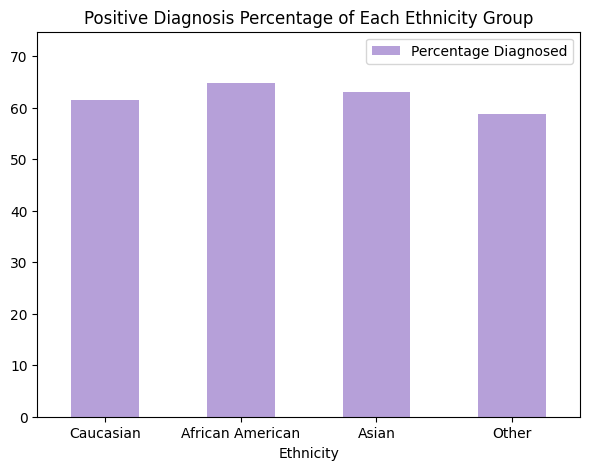

In [274]:
# Here we plot the percentages of each ethnicity diagnosed.
ethnicity_count.plot(kind = 'bar', x = 'Ethnicity', y = 'Percentage Diagnosed', color = '#B6A0D9', title = "Positive Diagnosis Percentage of Each Ethnicity Group", figsize = (7, 5))
plt.ylim(0, ethnicity_count['Percentage Diagnosed'].max() + 10) # + 10 is used to add ten units to the graph's height above the max value
plt.xticks(rotation = 0);

The diagnosis ratio appears even between ethnicities, an attribute invisible when looking at the number of patients diagnosed by ethnicity alone. Given the above findings, we want to further verify that diagnosis and ethnicity are independent.

In [275]:
# Dropping a column in preparation to feed df into Chi Square Test of Independence
ethnicity_count.drop(columns = ['Percentage Diagnosed'], inplace = True)

In [276]:
# Here we manually create the equivalent of a contingency table
ethnicity_count['Not Diagnosed'] = ethnicity_count['Tested Count'] - ethnicity_count['Diagnosed']
ethnicity_count.drop(columns = 'Tested Count', inplace = True)

In [277]:
ethnicity_count

,Ethnicity,Diagnosed,Not Diagnosed
0,Caucasian,780,490
1,African American,275,150
2,Asian,124,73
3,Other,125,88


In [278]:
# We apply a Chi Square test of Independence to verify that ethnicity and diagnosis are independent.
chi2, p, dof, expected = stats.chi2_contingency(ethnicity_count.iloc[:, 1:].values) #values returns the dataframe or series as a numpy array
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 2.5677731503144807
P-value: 0.4631673608504866
Degrees of Freedom: 3
Expected Frequencies:
 [[786.73634204 483.26365796]
 [263.27790974 161.72209026]
 [122.03705463  74.96294537]
 [131.94869359  81.05130641]]


The p-value of .463 suggests that the data presents no significant relationship between Parkinson's diagnosis and ethnicity.

### Lifestyle Factors

##### Smoking, BMI, Alcohol Consumption, Physical Activity, Diet Quality, Sleep Quality

#### Smoking

In [279]:
# Here we group the positive parkinson df by smoking and count the smoking and non-smoking popluations.
# We also rename the 0 and 1 labels to "Non-Smoker" and "Smoker" for ease of use.
pos_smoking_group = pos_parkinsons_df.groupby('Smoking')['Smoking'].count().reset_index(name = 'Population')
pos_smoking_group['Smoking'] = pos_smoking_group['Smoking'].apply(lambda x: "Non-Smoker" if x == 0 else "Smoker")
pos_smoking_group.index = pos_smoking_group['Smoking']

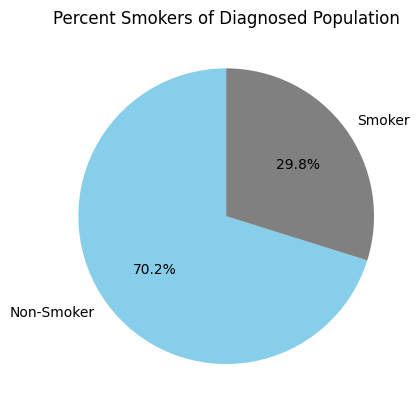

In [280]:
# Plotting the distribution of smokers of diagnosed population.
pos_smoking_group['Population'].plot.pie(
    autopct = '%1.1f%%',
    startangle = 90,
    colors = ['skyblue', 'gray'],
    ylabel = '',
    title = "Percent Smokers of Diagnosed Population")
plt.show()

In [281]:
# Here we create a contingency table in preparation for a Chi Square Test of Independence
smoking_group = og_parkinsons_df[['Smoking', 'Diagnosis']]
cont_table_smoking = pd.crosstab(smoking_group['Smoking'], smoking_group['Diagnosis'])
cont_table_smoking

Diagnosis,0,1
Smoking,,
0,566,915
1,235,389


Though a large portion of those diagnosed with Parkinsons smoke, we need to verify that diagnosis is or is not dependent on smoking.

In [282]:
# Conducting an Chi Squared Test of Indpendency
chi2, p, dof, expected = stats.chi2_contingency(cont_table_smoking)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.03659554867356973
P-value: 0.8482908504732563
Degrees of Freedom: 1
Expected Frequencies:
 [[563.55391924 917.44608076]
 [237.44608076 386.55391924]]


The p-value, 0.848, is very high, suggesting that there is no significant relationship between diagnosis and smoking.

#### BMI

In [283]:
# Creating a new df to investiagte the relationship between BMI and Parkinson's diagnosis
bmi_group = og_parkinsons_df.loc[:, ['BMI', 'Diagnosis']]

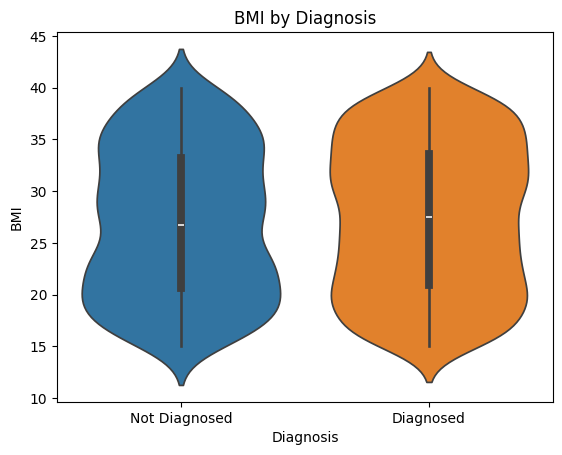

In [284]:
### Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(x = 'Diagnosis', y = 'BMI', data = bmi_group, hue = 'Diagnosis', legend = False);
plt.xticks([0,1], ['Not Diagnosed', 'Diagnosed']);
plt.title("BMI by Diagnosis");

Both distributions are roughly symmetrical, so there isn't a strong skew in either direction. Furthermore, their ditstributions are similar, requiring statistic tests for confirmation.

In [285]:
# Splitting the bmi group based on diagnosis
pos_bmi = bmi_group[bmi_group["Diagnosis"] == 1]["BMI"]
neg_bmi = bmi_group[bmi_group["Diagnosis"] == 0]["BMI"]

In [286]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_bmi, neg_bmi, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 540846.0
P-value: 0.16965702540880045


The P value, .1696, is very high, suggesting there is no statistically significant difference between the groups. Thus, there is no clear association between BMI and Parkinson's diagnosis.

#### Alcohol

In [287]:
#Creating a new df to investigate the correlation between alcohol use and Parkinson's diagnosis
alcohol_group = og_parkinsons_df.loc[:, ['AlcoholConsumption', 'Diagnosis']]
alcohol_group.rename(columns = {"AlcoholConsumption": "Alcohol Consumption"}, inplace = True)
alcohol_group

,Alcohol Consumption,Diagnosis
0,5.108241,0
1,6.027648,1
2,2.242135,1
3,5.997788,1
4,9.775243,0
...,...,...
2100,12.674393,0
2101,0.977018,1
2102,6.152286,1
2103,0.292094,1


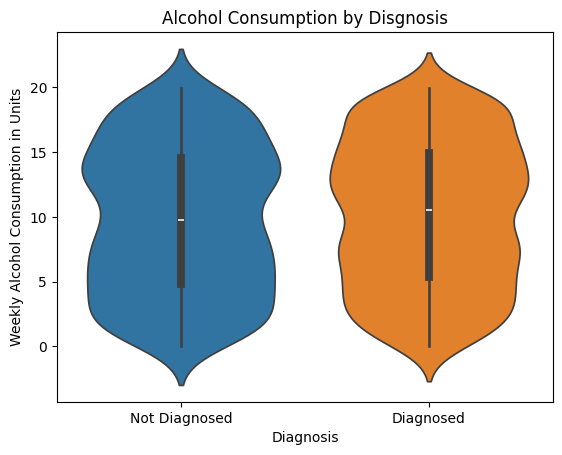

In [288]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(x = 'Diagnosis', y = 'Alcohol Consumption', data = alcohol_group, hue = 'Diagnosis', legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"]);
plt.ylabel("Weekly Alcohol Consumption in Units")
plt.title("Alcohol Consumption by Disgnosis");

Density is concentrated around the lower and higher values(around 5 and 15 units, respectively), suggesting distinct drinking patterns in the population. The overall shape and spread of the two groups are very similar, suggesting that alcohol consumption patterns do not differ significantly between diagnosed and not diagnosed populations. 

In [289]:
# Splitting the alcohol consumption group based on diagnosis
pos_alcohol = alcohol_group[alcohol_group["Diagnosis"] == 1]["Alcohol Consumption"]
neg_alcohol = alcohol_group[alcohol_group["Diagnosis"] == 0]["Alcohol Consumption"]

In [290]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_alcohol, neg_alcohol, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 544641.0
P-value: 0.0982081007768008


The P value, .098, suggests no statistically significant difference between the groups. Thus, there is no clear association between alcohol consumption and Parkinson's diagnosis.

#### Excercise

In [291]:
# Creating a new df to evaluate the relationship between excercise and Parkinson's diagnosis
excercise_group = og_parkinsons_df.loc[:, ["PhysicalActivity", "Diagnosis"]]
excercise_group

,PhysicalActivity,Diagnosis
0,1.380660,0
1,8.409804,1
2,0.213275,1
3,1.375045,1
4,1.188607,0
...,...,...
2100,5.325900,0
2101,0.108599,1
2102,5.775103,1
2103,2.280475,1


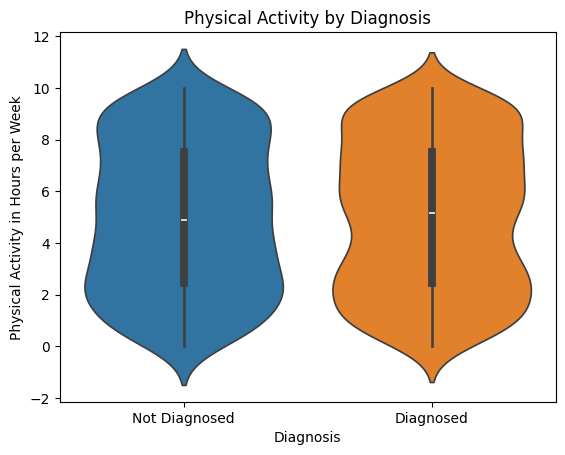

In [292]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(x = "Diagnosis", y = "PhysicalActivity", data = excercise_group, hue = "Diagnosis", legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.ylabel("Physical Activity in Hours per Week");
plt.title("Physical Activity by Diagnosis");

The density is concentrated around the lower and higher values (around two and eight hours of physical activity per week, respectively), suggesting specific execercise patterns within the population. Furthermore, their distributions appear somewhat symmetrical. Their similar shapes and spreads imply that physical activity patterns between the diagnosed and not diagnosed populations do not differ significantlty.

In [293]:
# Splitting the excercise group based on diagnosis
pos_activity = excercise_group[excercise_group['Diagnosis'] == 1]['PhysicalActivity']
neg_activity = excercise_group[excercise_group["Diagnosis"] == 0]['PhysicalActivity']

In [294]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_activity, neg_activity, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 530053.0
P-value: 0.5645198403138774


The P-value for the two variables, 0.565, is very high, suggesting there is no statistically significant difference between the groups. Thus, there is no clear association between physical activity and Parkinson's diagnosis. 

#### Diet

In [295]:
# Creating a new df to evaluate the relationship between diet and Parkinson's diagnosis
diet_group = og_parkinsons_df.loc[:, ['DietQuality', 'Diagnosis']]
diet_group

,DietQuality,Diagnosis
0,3.893969,0
1,8.513428,1
2,6.498805,1
3,6.715033,1
4,4.657572,0
...,...,...
2100,5.947278,0
2101,4.825187,1
2102,0.334244,1
2103,9.598513,1


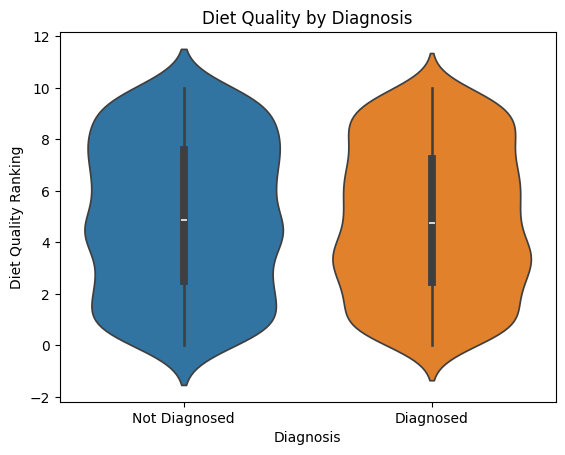

In [296]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(x = 'Diagnosis', y = 'DietQuality', data = diet_group, hue = 'Diagnosis', legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.ylabel("Diet Quality Ranking")
plt.title("Diet Quality by Diagnosis");

Overall, the shapes and disrtibutions of the two graphs are very similar, suggesting that diet quality patterns do not differ significantly between diagnosed and not diagnosed groups.

In [297]:
# Splitting the diet quality group based on diagnosis
pos_diet = diet_group[diet_group['Diagnosis'] == 1]['DietQuality']
neg_diet = diet_group[diet_group["Diagnosis"] == 0]["DietQuality"]

In [298]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_diet, neg_diet, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 508145.0
P-value: 0.2974584657007917


The P value, .2975, suggests no significant statistic difference between the groups. Thus, these is no clear association between diet quality and Parkinson's diagnosis.

#### Sleep

In [299]:
# Creating a new df to evaluate the relationship between sleep quality and Parkinson's diagnosis.
sleep_group = og_parkinsons_df.loc[:, ['SleepQuality', 'Diagnosis']]
sleep_group

,SleepQuality,Diagnosis
0,9.283194,0
1,5.602470,1
2,9.929824,1
3,4.196189,1
4,9.363925,0
...,...,...
2100,6.296231,0
2101,6.342325,1
2102,9.740019,1
2103,8.289390,1


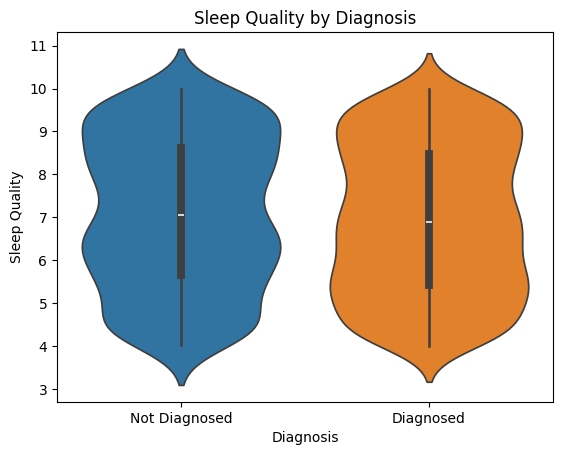

In [300]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(x = 'Diagnosis', y = 'SleepQuality', data = sleep_group, hue = 'Diagnosis', legend = False)
plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])
plt.ylabel("Sleep Quality")
plt.title("Sleep Quality by Diagnosis");

The not diagnosed graph exhibits is greatest density near the top, around sleep ranking 9, while the diagnosed graph exhibits its greatest density around ranking five. However, both graphs are bimodal and the diagnosed graph also exhibits a secondary peak at around sleep ranking nine. Their somewhat similar distributions suggest a potential difference in sleep patterns among diagnosed and not dignosed populations. 

In [301]:
# Splitting the sleep quality group based on diagnosis
pos_sleep = sleep_group[diet_group["Diagnosis"] == 1]["SleepQuality"]
neg_sleep = sleep_group[diet_group["Diagnosis"] == 0]["SleepQuality"]

In [302]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_sleep, neg_sleep, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 495337.0
P-value: 0.04682367820663572


The P value, .047, suggests a significant difference between the groups--an association between sleep quality and Parkinson's diagnosis. The Mann-Whitney U test combined with the distribution observed in the violin graphs suggests a negative correlation between sleep quality and Parkinson's diagnosis.

### Medical History

##### Family History of Parkinsons, Traumatic Brain Injury, Hypertension, Diabetes, Depression, Stroke

#### Family History of Parkinson's

In [303]:
# Creating a new df to evaluate the relationship between family history of Parkinson's and Parkinson's diagnosis.
# We create a contingency table to feed into the .plot function and normalize it to view the proportion of patients rather than their raw numbers.
fam_history_group = og_parkinsons_df[['FamilyHistoryParkinsons', 'Diagnosis']]
fam_cont_table_freq = pd.crosstab(fam_history_group['FamilyHistoryParkinsons'], fam_history_group['Diagnosis'], normalize = 'index')
fam_cont_table_freq

Diagnosis,0,1
FamilyHistoryParkinsons,,
0,0.383204,0.616796
1,0.364821,0.635179


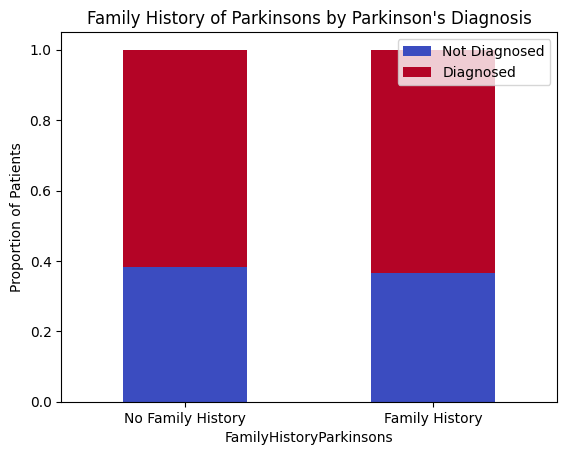

In [304]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
fam_cont_table_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ["No Family History", "Family History"], rotation = 0);
plt.ylabel("Proportion of Patients")
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.title("Family History of Parkinsons by Parkinson's Diagnosis");

The stacked bars appear similar, with both proportions of patients not diagnosed around 37%. This suggests little to no relationship between family history of Parksinon's and Parkinson's diagnosis. 

In [305]:
# Here we create a new contingency table with the raw values instead of proportions.
fam_cont_table = pd.crosstab(fam_history_group['FamilyHistoryParkinsons'], fam_history_group['Diagnosis'])
fam_cont_table

Diagnosis,0,1
FamilyHistoryParkinsons,,
0,689,1109
1,112,195


In [306]:
# To further validate our above finding, we conduct a Chi Square Test of Indepenency.
chi2, p, dof, expected = stats.chi2_contingency(fam_cont_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.30197541334165434
P-value: 0.5826466562022715
Degrees of Freedom: 1
Expected Frequencies:
 [[ 684.17957245 1113.82042755]
 [ 116.82042755  190.17957245]]


The P value of .302 suggests that the data shows no statistically significant relationship between an individual's family history of Parkinson's and their likelihood of diagnosis, confirming our finding from the stacked bar plot. 

#### Traumatic Brain Injury

In [307]:
# Creating a new df to evaluate the relationship between patient history of TBI and Parkinson's diagnosis.
tbi_group = og_parkinsons_df[['TraumaticBrainInjury', 'Diagnosis']]
tbi_group

,TraumaticBrainInjury,Diagnosis
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
2100,0,0
2101,0,1
2102,0,1
2103,0,1


In [308]:
# Creating a contingency table with the proportion of patients in each entry.
cont_table_tbi_freq = pd.crosstab(tbi_group['TraumaticBrainInjury'], tbi_group['Diagnosis'], normalize = 'index')
cont_table_tbi_freq

Diagnosis,0,1
TraumaticBrainInjury,,
0,0.384370,0.615630
1,0.348214,0.651786


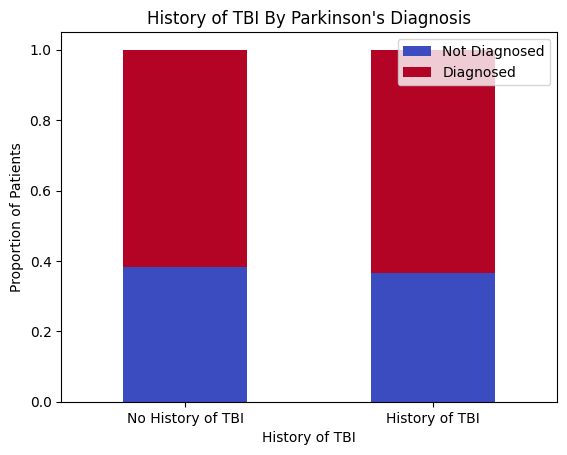

In [309]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
fam_cont_table_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ["No History of TBI", "History of TBI"], rotation = 0);
plt.ylabel("Proportion of Patients")
plt.xlabel("History of TBI")
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.title("History of TBI By Parkinson's Diagnosis");

The proportions of diagnosed and not diagnosed individuals with a history of TBI are both around 63%, suggesting no relationship between TBI and Parkinson's. 

In [310]:
# Creating a new contingency table with raw values instead of proportions.
cont_table_tbi = pd.crosstab(tbi_group['TraumaticBrainInjury'], tbi_group['Diagnosis'])
cont_table_tbi

Diagnosis,0,1
TraumaticBrainInjury,,
0,723,1158
1,78,146


In [311]:
# Verifying our above finding with a Chi Square Test of Independency
chi2, p, dof, expected = stats.chi2_contingency(cont_table_tbi)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.9619433959405695
P-value: 0.32669772581264994
Degrees of Freedom: 1
Expected Frequencies:
 [[ 715.76294537 1165.23705463]
 [  85.23705463  138.76294537]]


The P value pf .327 suggests no significant relationship between patients' history of TBI and Parkinson's diagnosis, confirming our finding from the previous stacked bar graph.

#### Hypertension

In [312]:
# Creating a new df to evaluate the relationship between patient history of hypertension and Parkinson's diagnosis
hypertension_group = og_parkinsons_df[["Hypertension", "Diagnosis"]]
hypertension_group

,Hypertension,Diagnosis
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
2100,1,0
2101,0,1
2102,0,1
2103,0,1


In [313]:
# Creating a contingency table with the proportions of each group.
cont_table_hypertension_freq = pd.crosstab(hypertension_group['Hypertension'], hypertension_group['Diagnosis'], normalize = "index")
cont_table_hypertension_freq

Diagnosis,0,1
Hypertension,,
0,0.378198,0.621802
1,0.394137,0.605863


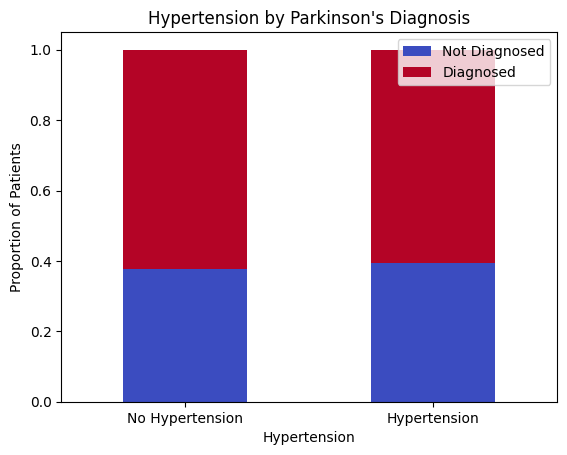

In [314]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_hypertension_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ["No Hypertension", "Hypertension"], rotation = None)
plt.ylabel("Proportion of Patients")
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.title("Hypertension by Parkinson's Diagnosis");

The proportion of patients with a history of hypertension is about 61% in both graphs, suggesting no significant relationship between patient history of hypertension and Parkinson's diagnosis.

In [315]:
# Creating a contingency table with the raw values of petients in each grup instead of proportions. 
cont_table_hypertension = pd.crosstab(hypertension_group['Hypertension'], hypertension_group['Diagnosis'])
cont_table_hypertension

Diagnosis,0,1
Hypertension,,
0,680,1118
1,121,186


In [316]:
# Verifying the above finding with a Chi Square Test of Independency
chi2, p, dof, expected = stats.chi2_contingency(cont_table_hypertension)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 0.21903466172678315
P-value: 0.639776444073406
Degrees of Freedom: 1
Expected Frequencies:
 [[ 684.17957245 1113.82042755]
 [ 116.82042755  190.17957245]]


The P value, .640, suggests no significant relationship between history of hypertension and Parkinson's diagnosis, confirming our findingss from the previous bar graph. 

#### Diabetes

In [317]:
# Creating a new df to evaluate the relationship between patient history if diabetes and Parkinson's diagnosis.
diabetes_group = og_parkinsons_df[['Diabetes', 'Diagnosis']]
diabetes_group

,Diabetes,Diagnosis
0,0,0
1,0,1
2,1,1
3,0,1
4,0,0
...,...,...
2100,0,0
2101,0,1
2102,1,1
2103,0,1


In [318]:
# Creating a contingency table with the proportins of patients in each group to feed into the .plot function.
cont_table_diabetes_freq = pd.crosstab(diabetes_group['Diabetes'], diabetes_group['Diagnosis'], normalize = 'index')
cont_table_diabetes_freq

Diagnosis,0,1
Diabetes,,
0,0.392080,0.607920
1,0.314103,0.685897


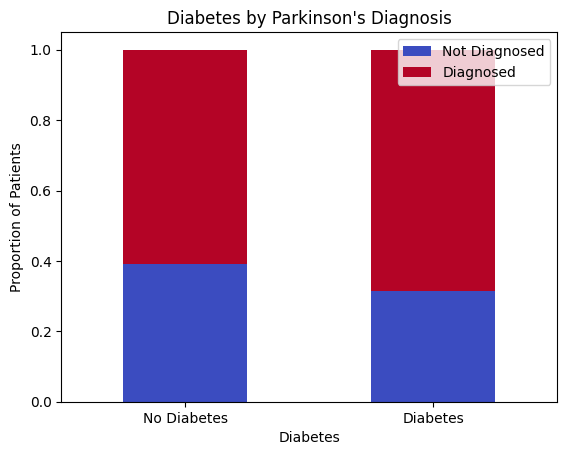

In [319]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_diabetes_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.title("Diabetes by Parkinson's Diagnosis");

Here, the proportion of patients with diabetes who recieved diagnoses is signifiantly higher than that of those without diabetes. This relationship suggests a positive correlation between diabetes and Parkinson's.

In [320]:
# We create another contingency table with the raw values of each group.
cont_table_diabetes = pd.crosstab(diabetes_group['Diabetes'], diabetes_group['Diagnosis'])
cont_table_diabetes

Diagnosis,0,1
Diabetes,,
0,703,1090
1,98,214


In [321]:
# Performing a Chi Square Test of Indepenedency to verify our above finding.
chi2, p, dof, expected = stats.chi2_contingency(cont_table_diabetes)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 6.528361689096501
P-value: 0.010616769948713857
Degrees of Freedom: 1
Expected Frequencies:
 [[ 682.27695962 1110.72304038]
 [ 118.72304038  193.27695962]]


The P value of .0106 suggets significant dependency between patient history of diabetes and Parkinson's diagnosis.

#### Depression

In [322]:
# Creating a new df to evalute the relationship between patient history of depression and Parkinson's diagnosis.
depression_group = og_parkinsons_df[['Depression', 'Diagnosis']]
depression_group

,Depression,Diagnosis
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
2100,0,0
2101,0,1
2102,0,1
2103,0,1


In [323]:
# Here we create a contingency table with the proportion of patients in each group
cont_table_depression_freq = pd.crosstab(depression_group['Depression'], depression_group['Diagnosis'], normalize = 'index')
cont_table_depression_freq

Diagnosis,0,1
Depression,,
0,0.395099,0.604901
1,0.324074,0.675926


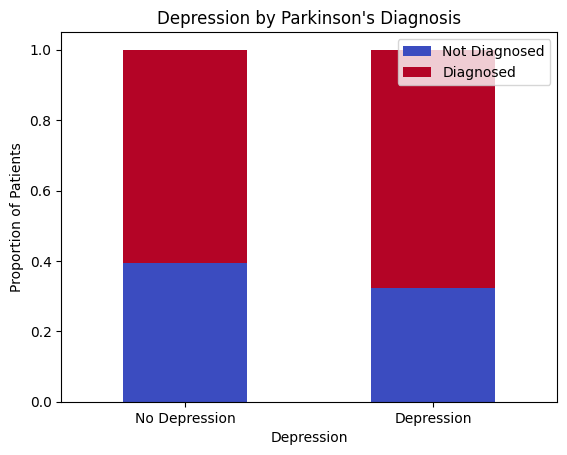

In [324]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_depression_freq.plot(kind = 'bar', stacked = True, colormap = "coolwarm")
plt.xticks([0, 1], ['No Depression', 'Depression'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Depression by Parkinson's Diagnosis");

The diagnosed proportion of patients with depression is significantly higher than that of the not depressed group. This relationship suggests a positive corrlation between depression and Parkinson's.

In [325]:
# Creating a contingency table with the raw values of individuals in each group.
cont_table_depression = pd.crosstab(depression_group['Depression'], depression_group['Diagnosis'])
cont_table_depression

Diagnosis,0,1
Depression,,
0,661,1012
1,140,292


In [326]:
# Conducting a Chi Square test of Independency to verify above finding.
chi2, p, dof, expected = stats.chi2_contingency(cont_table_depression)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 7.049270977400681
P-value: 0.007929751837804097
Degrees of Freedom: 1
Expected Frequencies:
 [[ 636.61425178 1036.38574822]
 [ 164.38574822  267.61425178]]


The P value, .0079, is very low, strongly suggesting dependency between depression and Parkinson's diagnosis.

#### Stroke

In [327]:
# Creating a new df to evaluate relationship between patient history of stroke and Parkinson's diagnosis.
stroke_group = og_parkinsons_df[['Stroke', 'Diagnosis']]
stroke_group

,Stroke,Diagnosis
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
2100,0,0
2101,0,1
2102,1,1
2103,0,1


In [328]:
# Creating a contingency table with the proportions of patients in each group to feed into the .plot function.
cont_table_stroke_freq = pd.crosstab(stroke_group['Stroke'], stroke_group['Diagnosis'], normalize = "index")
cont_table_stroke_freq

Diagnosis,0,1
Stroke,,
0,0.383616,0.616384
1,0.320388,0.679612


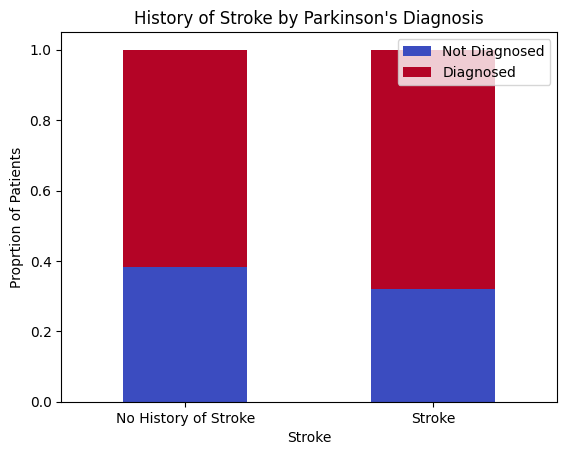

In [329]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_stroke_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ["No History of Stroke", "Stroke"], rotation = 0)
plt.ylabel("Proprtion of Patients")
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.title("History of Stroke by Parkinson's Diagnosis");

The proportion of patients with a history of stroke who recieved Parkinson's diagnosis is significantly higher than that of patients with no history of stroke. This relationship suggests a positive correlation between patient history of stroke and Parkinson's diagnosis. 

In [330]:
# Creating a contingency table with the raw number of patients in each group.
cont_table_stroke = pd.crosstab(stroke_group['Stroke'], stroke_group['Diagnosis'])
cont_table_stroke

Diagnosis,0,1
Stroke,,
0,768,1234
1,33,70


In [331]:
# Conducting a Chi Square Test of Independency to verify above finding.
chi2, p, dof, expected = stats.chi2_contingency(cont_table_stroke)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 1.4039544163419633
P-value: 0.23606259298230944
Degrees of Freedom: 1
Expected Frequencies:
 [[ 761.80617577 1240.19382423]
 [  39.19382423   63.80617577]]


In contrast to the supposed relationship observed in the bar graph, the P value, .2361, suggests no significant relationship between patient history of stroke and Parkinson's diagnosis. 

### Clinical Measurements
##### Systolic BP, Diastolic BP, Cholesterol Total, Cholesterol LDL, Cholesterol HDL, Cholesterol Triglycerides

#### Systolic BP

In [332]:
# Creating a new df to evaluate the relationship between systolic BP and Parkinson's diagnosis.
systolicBP_group = og_parkinsons_df[["SystolicBP", "Diagnosis"]]
systolicBP_group

,SystolicBP,Diagnosis
0,129,0
1,163,1
2,113,1
3,146,1
4,115,0
...,...,...
2100,92,0
2101,103,1
2102,168,1
2103,129,1


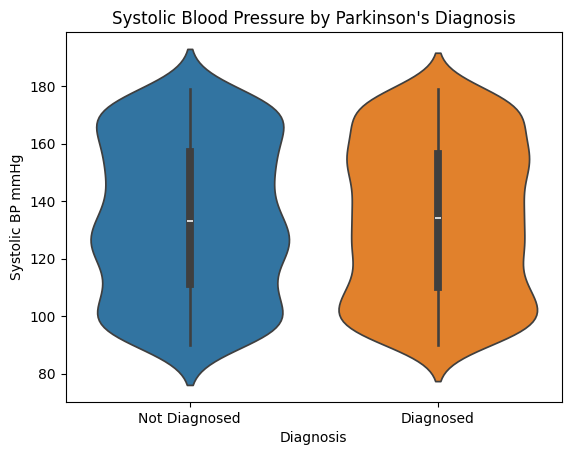

In [333]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = systolicBP_group, x = 'Diagnosis', y = "SystolicBP", hue = 'Diagnosis', legend = False)
plt.title("Systolic Blood Pressure by Parkinson's Diagnosis");
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"]);
plt.ylabel("Systolic BP mmHg");

The not diagnosed graph exhibits its greatest peak at around 170 mmHg while the diagnosed graph exhibits its greatest peak at arounf 100 mmHg. However, their overall shapes and spreads are very similar, implying that Systolic BP mmHg patterns do not differ significantly between diagnosed and not diagnosed populations.

In [334]:
# Splitting the systolic BP group based on diagnosis
pos_systolicBP = systolicBP_group[systolicBP_group["Diagnosis"] == 1]["SystolicBP"]
neg_systolicBP = systolicBP_group[systolicBP_group["Diagnosis"] == 0]["SystolicBP"]

In [335]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_systolicBP, neg_systolicBP, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 519617.0
P-value: 0.8457091029986066


The P value, .8457, suggests no significant statistic difference between the groups. Thus, these is no clear association between systolic BP and and Parkinson's diagnosis.

#### Diastolic BP

In [336]:
# Creating a new df to evaluate the relationship between diastolic BP and Parkinson's diagnosis.
diastolicBP_group = og_parkinsons_df[["DiastolicBP", "Diagnosis"]]
diastolicBP_group

,DiastolicBP,Diagnosis
0,60,0
1,76,1
2,93,1
3,78,1
4,94,0
...,...,...
2100,98,0
2101,96,1
2102,79,1
2103,97,1


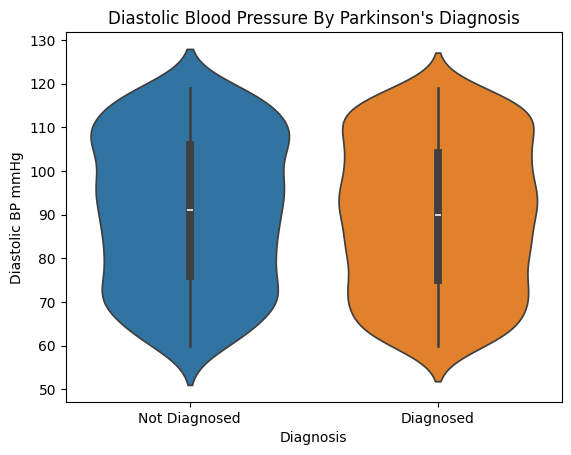

In [337]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = diastolicBP_group, x = 'Diagnosis', y = 'DiastolicBP', hue = "Diagnosis", legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.ylabel("Diastolic BP mmHg")
plt.title("Diastolic Blood Pressure By Parkinson's Diagnosis");

The spreads and distributions of the graphs are very similar, suggesting that diastolic blood pressure patterns do not differ significantly between diagnosed and not diagnosed populations.

In [338]:
# Splitting the diastolic BP group based on diagnosis
pos_diastolicBP = diastolicBP_group[diastolicBP_group["Diagnosis"] == 1]["DiastolicBP"]
neg_diastolicBP = diastolicBP_group[diastolicBP_group["Diagnosis"] == 0]["DiastolicBP"]

In [339]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_diastolicBP, neg_diastolicBP, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 504388.5
P-value: 0.18698406503798337


The P value, .1870, suggests no significant statistic difference between the groups. Thus, these is no clear association between diastolic BP and and Parkinson's diagnosis.

#### Cholesterol Total

In [340]:
# Creating a new df to evaluate the relationship between total cholesterol and Parkinson's diagnosis.
cholesterol_total_group = og_parkinsons_df[["CholesterolTotal", "Diagnosis"]]
cholesterol_total_group

,CholesterolTotal,Diagnosis
0,222.842278,0
1,210.501133,1
2,287.387996,1
3,280.339546,1
4,284.014151,0
...,...,...
2100,191.372707,0
2101,150.188647,1
2102,159.351155,1
2103,232.240473,1


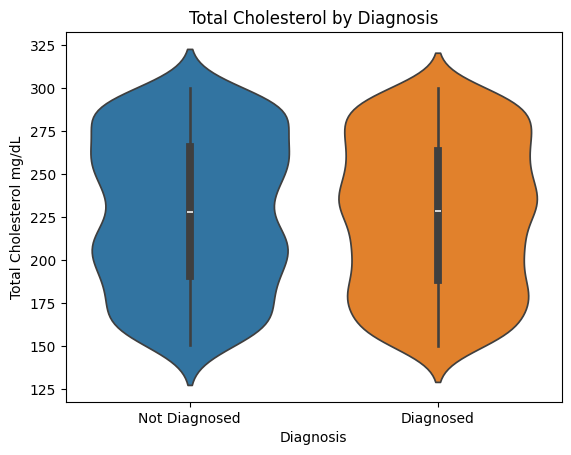

In [341]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = cholesterol_total_group, x = "Diagnosis", y = "CholesterolTotal", hue = "Diagnosis", legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.ylabel("Total Cholesterol mg/dL")
plt.title("Total Cholesterol by Diagnosis");

The spreads and shapes of the graphs are very similar, suggesting that diastolic total cholesterol patterns do not differ significantly between diagnosed and not diagnosed populations.

In [342]:
# Splitting the diastolic BP group based on diagnosis
pos_cholesterol_total = cholesterol_total_group[cholesterol_total_group["Diagnosis"] == 1]["CholesterolTotal"]
neg_cholesterol_total = cholesterol_total_group[cholesterol_total_group["Diagnosis"] == 0]["CholesterolTotal"]

In [343]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_cholesterol_total, neg_cholesterol_total, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 510337.0
P-value: 0.378859819634506


The P value, .3789, suggests no significant statistic difference between the groups. Thus, these is no clear association between total cholesterol measurements and and Parkinson's diagnosis.

#### Low Density Lipoprotein (LDL) Cholesterol

In [344]:
# Creating a new df to evaluate the relationship between LDL cholesterol and Parkinson's diagnosis
cholesterolLDL_group = og_parkinsons_df[['CholesterolLDL', 'Diagnosis']]

Text(0, 0.5, 'LDL Cholesterol mg/dL')

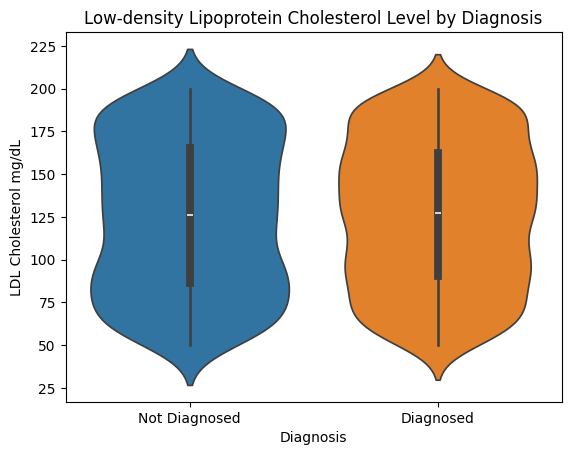

In [345]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = cholesterolLDL_group, x = 'Diagnosis', y = 'CholesterolLDL', hue = 'Diagnosis', legend = False);
plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed']);
plt.title('Low-density Lipoprotein Cholesterol Level by Diagnosis');
plt.ylabel("LDL Cholesterol mg/dL")

The not diagnosed graph exhibits its highest peak at around 75 mg/dl and another, secondary peak, around 175 mg/dl, taking on a convex shape between the two peaks. On the other hand, the diagnosed graph exhibits its highest peak at around 150mg/dl, with other, smaller peaks immediately surrounding it. Despite the difference in peaks, the distribution and spread of the graphs are similar, making their relationship unclear from their violin graphs alone.

In [346]:
# Splitting the cholesterol LDL group based on diagnosis
pos_cholesterolLDL = cholesterolLDL_group[cholesterolLDL_group["Diagnosis"] == 1]["CholesterolLDL"]
neg_cholesterolLDL = cholesterolLDL_group[cholesterolLDL_group["Diagnosis"] == 0]["CholesterolLDL"]

In [347]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_cholesterolLDL, neg_cholesterolLDL, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 531242.0
P-value: 0.5067159064354478


The P value, .5067, suggests no significant statistic difference between the groups. Thus, these is no clear association between LDL cholesterol measurements and and Parkinson's diagnosis.

#### High-Density Lipoprotein (HDl) Cholesterol

In [348]:
# Creating a new df to evaluate the relationship between HDL cholesterol and Parkinson's diagnosis
cholesterolHDL_group = og_parkinsons_df[["CholesterolHDL", "Diagnosis"]]

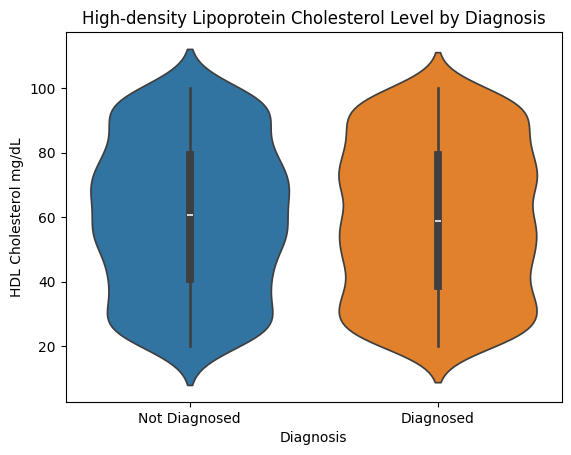

In [349]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = cholesterolHDL_group, x = "Diagnosis", y = "CholesterolHDL", hue = "Diagnosis", legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.title('High-density Lipoprotein Cholesterol Level by Diagnosis');
plt.ylabel("HDL Cholesterol mg/dL");

The spreads and shapes of the graphs are very similar, suggesting that HDL cholesterol patterns do not differ significantly between diagnosed and not diagnosed populations.

In [350]:
# Splitting the cholesterol HDL group based on diagnosis
pos_cholesterolHDL = cholesterolHDL_group[cholesterolHDL_group["Diagnosis"] == 1]["CholesterolHDL"]
neg_cholesterolHDL = cholesterolHDL_group[cholesterolHDL_group["Diagnosis"] == 0]["CholesterolHDL"]

In [351]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_cholesterolHDL, neg_cholesterolHDL, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 510157.0
P-value: 0.3716998738819306


The P value, .3717, suggests no significant statistic difference between the groups. Thus, these is no clear association between HDL cholesterol measurements and and Parkinson's diagnosis

#### Cholesterol Triglycerides

In [352]:
# Creating a new df to evaluate the relationship between cholesterol triglycerides and Parkinson's diagnosis
cholesterol_triglycerides_group = og_parkinsons_df[['CholesterolTriglycerides', 'Diagnosis']]

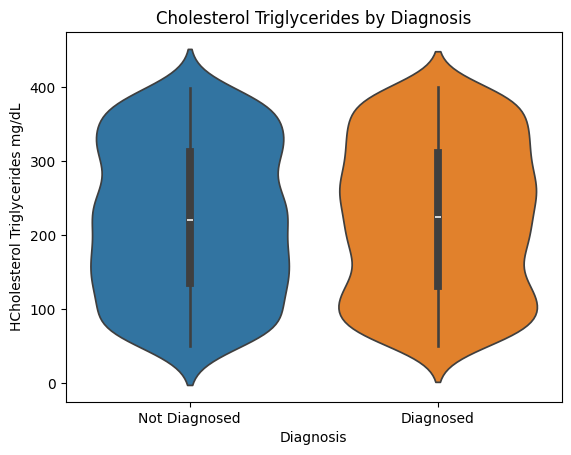

In [353]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = cholesterol_triglycerides_group, x = "Diagnosis", y = "CholesterolTriglycerides", hue = "Diagnosis", legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.title('Cholesterol Triglycerides by Diagnosis');
plt.ylabel("HCholesterol Triglycerides mg/dL");

The spreads and shapes of the graphs are very similar, suggesting that Cholesterol Triglyceride patterns do not differ significantly between diagnosed and not diagnosed populations.

In [354]:
# Splitting the diastolic BP group based on diagnosis
pos_cholesterol_triglycerides = cholesterol_triglycerides_group[cholesterol_triglycerides_group["Diagnosis"] == 1]["CholesterolTriglycerides"]
neg_cholesterol_triglycerides = cholesterol_triglycerides_group[cholesterol_triglycerides_group["Diagnosis"] == 0]["CholesterolTriglycerides"]

In [355]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_cholesterol_triglycerides, neg_cholesterol_triglycerides, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 532056.0
P-value: 0.4690156119812948


The P value, .4690, suggests no significant statistic difference between the groups. Thus, these is no clear association between cholesterol triglyceride measurements and and Parkinson's diagnosis.

### Cognitive and Functional Asessments
##### UPDRS, MoCA, Functional Assessment

#### UPDRS

In [376]:
# Creating a new df to evaluate the relationship between UPDRS scores and Parkinson's diagnosis
UPDRS_group = og_parkinsons_df[['UPDRS', 'Diagnosis']]

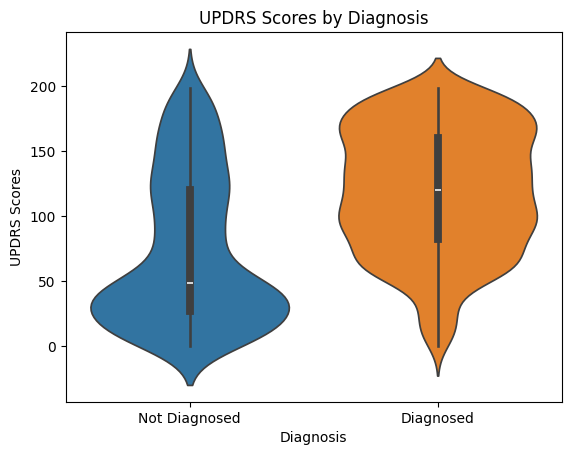

In [377]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = UPDRS_group, x = 'Diagnosis', y = 'UPDRS', hue = 'Diagnosis', legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.title('UPDRS Scores by Diagnosis');
plt.ylabel("UPDRS Scores");

The not diagnosed graph is positively skewed while the diagnosed graph is negatively skewed, though to a lesser magnitude of the not diagnosed graph. The diagnosed graph being negatively skewed implies that most diagnosed individuals have relatively severe symptoms, resulting in higher UPDRS scores, though not all. The two graphs suggest that the diagnosed group is more likley to have moderate or advances symptoms while individuals in the not diagnosed group are likley to have mild or early-stage symptoms.

#### MoCA

In [383]:
# Creating a new df to evaluate relationship between MoCA score and Parkinson's diagnosis
MoCA_group = og_parkinsons_df[['MoCA', 'Diagnosis']]

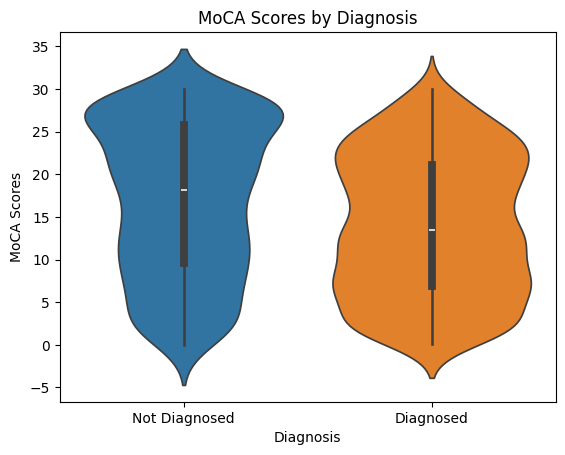

In [379]:
# Creating a violin plot to aid in visualizing the distribution shape, median, and spread between diagnosed and not diagnosed groups
sns.violinplot(data = MoCA_group, x = 'Diagnosis', y = 'MoCA', hue = 'Diagnosis', legend = False)
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.title('MoCA Scores by Diagnosis');
plt.ylabel("MoCA Scores");

The greatest peak of the not diagnosed graph sits around a MoCA score of 27.5 while that of the diagnosed graph is around 7.5. However, the diagnosed graph is multimodal, with another peak at around a 22.5 MoCA score. Overall, the not diagnosed graph carries most of its density near the top values while that of the diagnosed group occurs around the middle and lower values.

In [380]:
# Splitting the MoCA group based on diagnosis
pos_MoCA = MoCA_group[MoCA_group["Diagnosis"] == 1]["MoCA"]
neg_MoCA = MoCA_group[MoCA_group["Diagnosis"] == 0]["MoCA"]

In [381]:
# conducting a Mann-Whitney U Test
stat, p_value = mannwhitneyu(pos_MoCA, neg_MoCA, alternative = 'two-sided')
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 413825.0
P-value: 1.162789206726088e-15


The P value, a very low 1.163e-15, suggests a significant stastic difference between the MoCA scores of the diagnosed and not diagnosed populations. This analysis combined with the above violin graph implies a negtive correlation between MoCA scores and Parkinson's diagnosis.

### Symptoms
##### Tremor, Rigidity, Bradykinesia, Postural Instability, Speech Problems, Sleep Disorders, Constipation

Explicit numerical correlation values between symptoms and diagnosis provided at end of Symptoms section via heatmap.

#### Tremor

In [358]:
# Creating a new df to study temor specifically and making it into a contingency table to feed into the plot function.
tremor_group = og_parkinsons_df[['Tremor', 'Diagnosis']]
cont_table_tremor_freq = pd.crosstab(tremor_group['Tremor'], tremor_group['Diagnosis'], normalize = 'index')

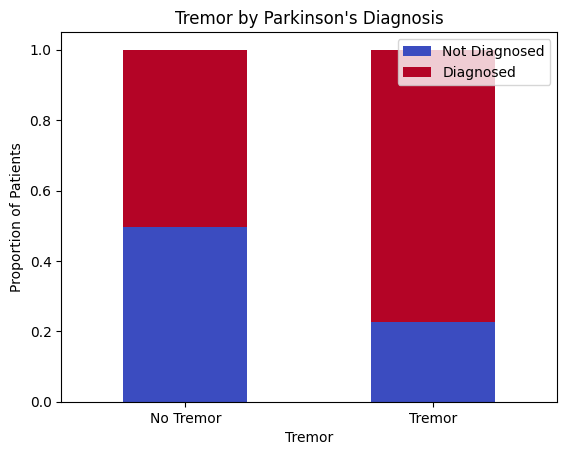

In [359]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_tremor_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Tremor', 'Tremor'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Tremor by Parkinson's Diagnosis");

#### Rigidity

In [360]:
# Creating a new df to study rigidity and making it into a contingency table to feed into the plot function.
rigidity_group = og_parkinsons_df[['Rigidity', 'Diagnosis']]
cont_table_rigidity_freq = pd.crosstab(rigidity_group['Rigidity'], rigidity_group['Diagnosis'], normalize = 'index')

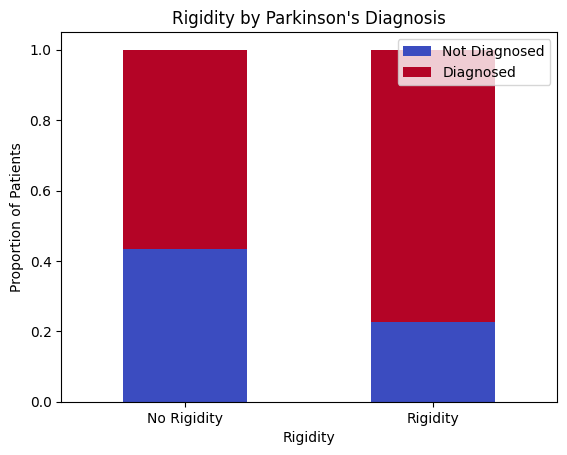

In [361]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_rigidity_freq.plot(kind = 'bar', stacked = True, colormap = "coolwarm")
plt.xticks([0, 1], ['No Rigidity', 'Rigidity'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Rigidity by Parkinson's Diagnosis");

#### Bradykinesia

In [362]:
# Creating a new df to study bradykinesia and making it into a contingency table to feed into the plot function.
bradykinesia_group = og_parkinsons_df[['Bradykinesia', 'Diagnosis']]
cont_table_bradykinesia_freq = pd.crosstab(bradykinesia_group['Bradykinesia'], bradykinesia_group['Diagnosis'], normalize = 'index')

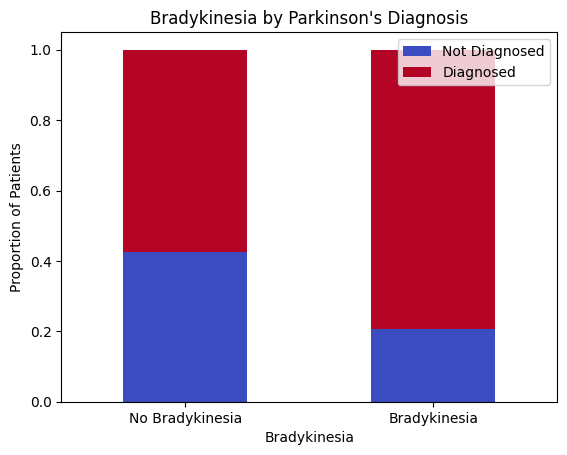

In [363]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_bradykinesia_freq.plot(kind = 'bar', stacked = True, colormap = "coolwarm")
plt.xticks([0, 1], ['No Bradykinesia', 'Bradykinesia'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Bradykinesia by Parkinson's Diagnosis");

#### Postural Instability

In [364]:
# Creating a new df to evaluate postural instability and making it into a contingency table to feel into the plot function.
pInstability_group = og_parkinsons_df[['PosturalInstability', 'Diagnosis']]
cont_table_pInstability_freq = pd.crosstab(pInstability_group['PosturalInstability'], pInstability_group['Diagnosis'], normalize = 'index')

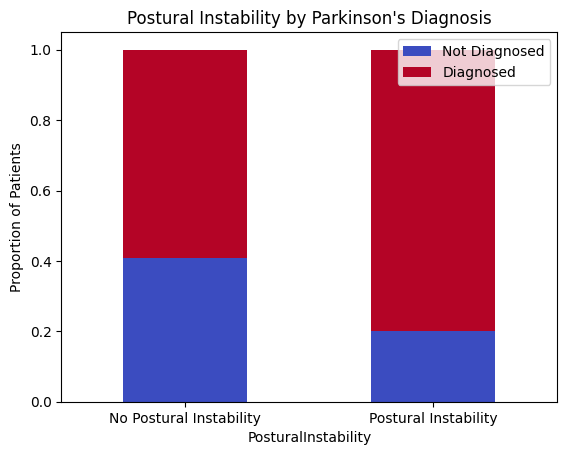

In [365]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_pInstability_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Postural Instability', 'Postural Instability'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Postural Instability by Parkinson's Diagnosis");

#### Speech Problems

In [366]:
# Creating a new df to evaluate speech problems and making it into a contingency table to feed into the plot function.
speech_problems_group = og_parkinsons_df[['SpeechProblems', 'Diagnosis']]
cont_table_speech_problems_freq = pd.crosstab(speech_problems_group['SpeechProblems'], speech_problems_group['Diagnosis'], normalize = 'index')

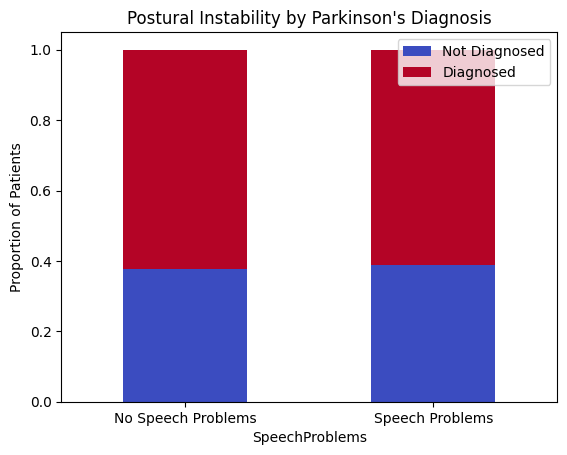

In [367]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_speech_problems_freq.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Speech Problems', 'Speech Problems'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Postural Instability by Parkinson's Diagnosis");

#### Sleep Disorders

In [368]:
# Creating a new df to evaluate sleep disorders and making it into a contingency table to feed into the plot function.
sleep_disorders_group = og_parkinsons_df[['SleepDisorders', 'Diagnosis']]
cont_table_sleep_disorders = pd.crosstab(sleep_disorders_group['SleepDisorders'], sleep_disorders_group['Diagnosis'], normalize = 'index')

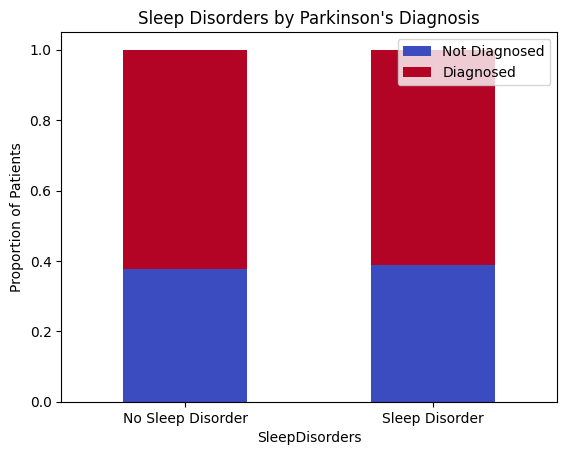

In [382]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_sleep_disorders.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Sleep Disorder', 'Sleep Disorder'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Sleep Disorders by Parkinson's Diagnosis");

#### Constipation

In [370]:
# Creating a new df to evaluate constipation and making it into a contingency table to feed into the plot function.
constipation_group = og_parkinsons_df[['Constipation', 'Diagnosis']]
cont_table_constipation = pd.crosstab(constipation_group['Constipation'], constipation_group['Diagnosis'], normalize = 'index')

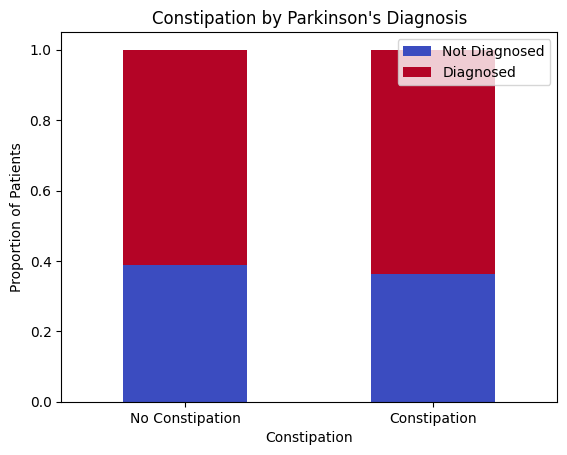

In [371]:
# Here we create a stacked bar plot using the contingency table, stacking it to more clearly compare diagnosed and not dignosed populations.
cont_table_constipation.plot(kind = 'bar', stacked = True, colormap = 'coolwarm')
plt.xticks([0, 1], ['No Constipation', 'Constipation'], rotation = 0)
plt.ylabel("Proportion of Patients")
plt.legend(['Not Diagnosed', 'Diagnosed'])
plt.title("Constipation by Parkinson's Diagnosis");

#### Total Symptom Heatmap

In [372]:
# Creating a new df for all of the heatmap data
symptom_heatmap_data = og_parkinsons_df[['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']]

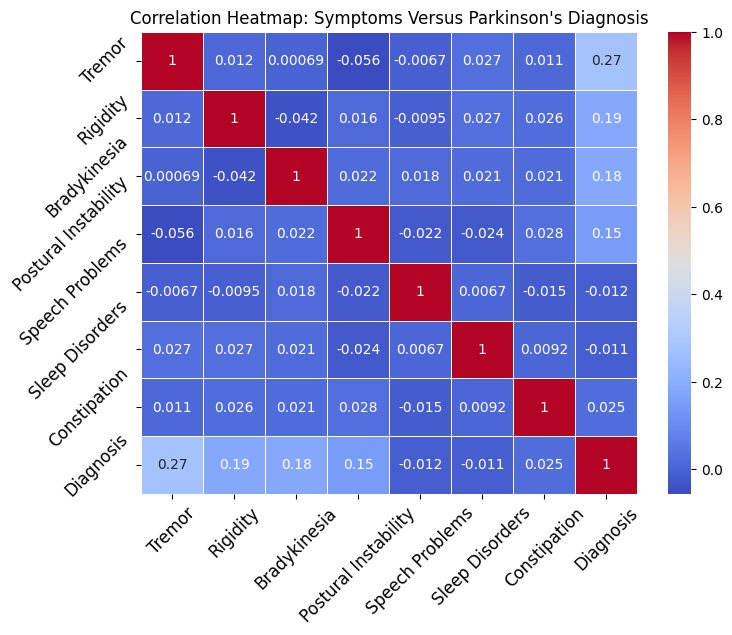

In [384]:
# Creating a heatmap to show the correlation strengths between symptoms and diagnosis.
corr_matrix = symptom_heatmap_data.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)

plt.title("Correlation Heatmap: Symptoms Versus Parkinson's Diagnosis")
plt.xticks(ticks = np.arange(len(corr_matrix.columns)) + 0.5,
           labels = ["Tremor", "Rigidity", "Bradykinesia", "Postural Instability", "Speech Problems", "Sleep Disorders", "Constipation", "Diagnosis"],
           rotation = 45, fontsize = 12);
plt.yticks(ticks = np.arange(len(corr_matrix.columns))+0.5,
           labels = ["Tremor", "Rigidity", "Bradykinesia", "Postural Instability", "Speech Problems", "Sleep Disorders", "Constipation", "Diagnosis"],
           rotation = 45, fontsize = 12);


One can see the strong correlations between common Parkinson's diagnosis and symptoms including tremors, rigidity, bradykinesia, postural instability, etc., with the highest one, .27, describing the correlation between tremors and Parkinson's diagnosis. Futhermore, the heatmap exhibits negative correlations between diagnosis and health conditions such as speech problems and sleep disorders, the most prominent of which being -0.012, describing the relationship between speech problems and diagnosis.